#Data Analysis and prediction on World's Wealthiest (The richest people in the world, yearly rank from 2002 to 2021)


The billionaires.csv dataset contains list of richestpeople in the world from the year 2002 till 2021

The World's Billionaires is an annual ranking by documented net worth of the world's wealthiest billionaires compiled and published in March annually by the American business magazine Forbes. The list was first published in March 1987. The total net worth of each individual on the list is estimated and is cited in United States dollars, based on their documented assets and accounting for debt. Royalty and dictators whose wealth comes from their positions are excluded from these lists. This ranking is an index of the wealthiest documented individuals, excluding and ranking against those with wealth that is not able to be completely ascertained. (wikipedia)

https://www.kaggle.com/datasets/seriadiallo1/world-billionaires/data

#Objectives
- Perform Data Wrangling/Cleaning(preprocessing) if required
- Perform EDA and find insights from the data
- Do Prediction of NetWorth using ML models and compare their model evaluation metric like $R^2$ and so on


In [1]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.5
!pip uninstall xgboost
!pip install xgboost==2.1.3

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.6.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.7 MB/s eta 0:00:00
Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/xgboost-2.1.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/xgboost.libs/libgomp-24e2ab19.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/xgboost/*
Proceed (Y/n)? Y
  Successfully uninstalled xgboost-2.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 8.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from wordcloud import WordCloud

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [7]:
df= pd.read_csv('/content/billionaires.csv')

In [8]:
df.head()

,year,rank,name,net_worth,age,natinality,source_wealth
0,2021,1,Jeff Bezos,177,57,United States,Amazon
1,2021,2,Elon Musk,151,49,United States,"Tesla, SpaceX"
2,2021,3,Bernard Arnault & family,150,72,France,LVMH
3,2021,4,Bill Gates,124,65,United States,Microsoft
4,2021,5,Mark Zuckerberg,97,36,United States,Facebook


In [9]:
df.tail()

,year,rank,name,net_worth,age,natinality,source_wealth
195,2002,6,Al-Waleed bin Talal,20.0,43,Saudi Arabia,Kingdom Holding Company
196,2002,7,S. Robson Walton,20.0,57,United States,Wal-Mart
197,2002,8,Masayoshi Son,19.4,43,Japan,"Softbank Capital, SoftBank Mobile"
198,2002,9,Michael Dell,19.1,35,United States,Dell
199,2002,10,Kenneth Thomson,16.1,77,Canada,The Thomson Corporation


In [10]:
df.describe(include='all')

,year,rank,name,net_worth,age,natinality,source_wealth
count,200.000000,200.000000,200,200,200.000000,200,200
unique,NaN,NaN,49,141,NaN,13,40
top,NaN,NaN,Bill Gates,20.0,NaN,United States,Microsoft
freq,NaN,NaN,20,9,NaN,115,25
mean,2011.500000,5.405000,NaN,NaN,66.475000,NaN,NaN
std,5.780751,2.801825,NaN,NaN,13.899112,NaN,NaN
min,2002.000000,1.000000,NaN,NaN,31.000000,NaN,NaN
25%,2006.750000,3.000000,NaN,NaN,55.000000,NaN,NaN
50%,2011.500000,5.500000,NaN,NaN,69.000000,NaN,NaN
75%,2016.250000,8.000000,NaN,NaN,77.000000,NaN,NaN


#Lets find some insights from the data

In [11]:
missing_values = df.isnull()

print(missing_values)

      year   rank   name  net_worth    age  natinality  source_wealth
0    False  False  False      False  False       False          False
1    False  False  False      False  False       False          False
2    False  False  False      False  False       False          False
3    False  False  False      False  False       False          False
4    False  False  False      False  False       False          False
..     ...    ...    ...        ...    ...         ...            ...
195  False  False  False      False  False       False          False
196  False  False  False      False  False       False          False
197  False  False  False      False  False       False          False
198  False  False  False      False  False       False          False
199  False  False  False      False  False       False          False

[200 rows x 7 columns]


No Missing Values

In [12]:
df.natinality.value_counts()

,count
natinality,
United States,115
Mexico,15
India,14
Spain,13
France,12
Germany,9
Sweden,6
Hong Kong,4
Saudi Arabia,4


Majority of the billionaires come from United States

In [13]:
df.source_wealth.value_counts()

,count
source_wealth,
Microsoft,25
Berkshire Hathaway,20
Oracle Corporation,16
"América Móvil, Grupo Carso",15
Koch Industries,12
Wal-Mart,11
Walmart,9
Aldi Süd,7
Amazon,6


And we can also say that Microsoft produced most number of billionaires

We can visualise "Which company has produced the highest number of billionaires?" using WordCloud and bar chart

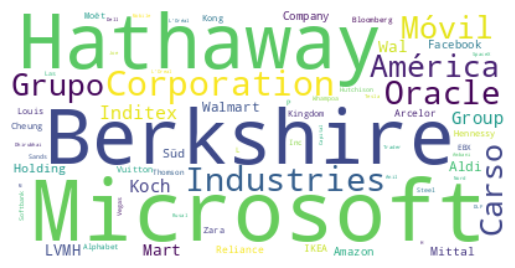

In [14]:
#Creating the text variable
text = " ".join(x for x in df.source_wealth)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
df_copy2= df.copy()
df2=df_copy2.groupby('source_wealth').count().reset_index()
df2

,source_wealth,year,rank,name,net_worth,age,natinality
0,Aldi,1,1,1,1,1,1
1,"Aldi Nord, Trader Joe's",1,1,1,1,1,1
2,Aldi Süd,7,7,7,7,7,7
3,Alphabet Inc.,3,3,3,3,3,3
4,Amazon,6,6,6,6,6,6
5,"América Móvil, Grupo Carso",15,15,15,15,15,15
6,Anil Dhirubhai Ambani Group,1,1,1,1,1,1
7,Arcelor Mittal,5,5,5,5,5,5
8,Berkshire Hathaway,20,20,20,20,20,20
9,Bloomberg L.P.,3,3,3,3,3,3


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'Aldi'),
  Text(1, 0, "Aldi Nord, Trader Joe's"),
  Text(2, 0, 'Aldi Süd'),
  Text(3, 0, 'Alphabet Inc.'),
  Text(4, 0, 'Amazon'),
  Text(5, 0, 'América Móvil, Grupo Carso'),
  Text(6, 0, 'Anil Dhirubhai Ambani Group'),
  Text(7, 0, 'Arcelor Mittal'),
  Text(8, 0, 'Berkshire Hathaway'),
  Text(9, 0, 'Bloomberg L.P.'),
  Text(10, 0, 'Cheung Kong Group, Hutchison Whampoa'),
  Text(11, 0, 'Cheung Kong Holdings'),
  Text(12, 0, 'Cheung Kong Holdings, Hutchison Whampoa'),
  Text(13, 0, 'DLF Group'),
  Text(14, 0, 'Dell'),
  Text(15, 0, 'EBX Group'),
  Text(16, 0, 'Facebook'),
  Text(17, 0, 'H&M'),
  Text(18, 0, 'IKEA'),
  Text(19, 0, 'Inditex'),
  Text(20, 0, 'Inditex Group'),
  Text(21, 0, 'Inditex, Zara'),
  Text(22, 0, 'Kingdom Holding Company'),
 

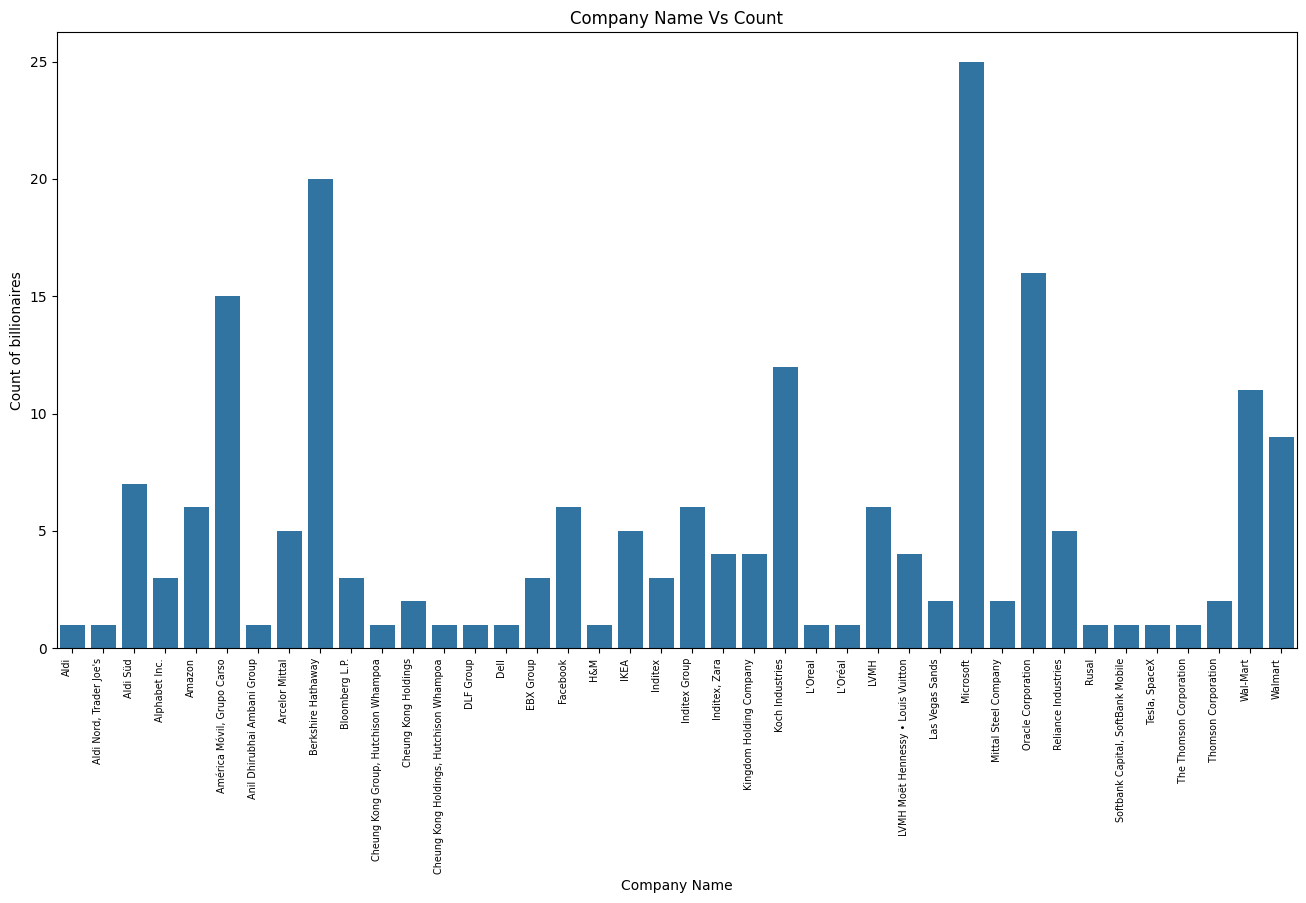

In [17]:
plt.figure(figsize=(16,8))
m=sns.barplot(x="source_wealth",y="year",data=df2)
m.set(xlabel ="Company Name", ylabel = "Count of billionaires", title ='Company Name Vs Count')

m.set_xticklabels(m.get_xticklabels(), fontsize=7)
plt.xticks( rotation=90, horizontalalignment='right',fontweight='light',fontsize='x-small' )

In [18]:
# Create a copy of the DataFrame to avoid modifying the original
df_copy = df.copy()

# Remove periods and convert 'net_worth' to numeric in the copy
df_copy['net_worth'] = df_copy['net_worth'].str.replace('.', '', regex=False).astype(float)

# Now group by year and calculate the mean using the copy
by_year = df_copy.groupby('year')
result = by_year[['net_worth', 'age']].mean()

# Display the result
print(result)

      net_worth   age
year                 
2002      275.2  55.0
2003      266.3  60.8
2004      255.0  61.6
2005      262.2  62.8
2006      277.4  64.3
2007      343.5  65.9
2008      426.0  63.8
2009      253.9  70.6
2010      342.2  66.0
2011      406.1  63.7
2012      395.4  70.8
2013      451.5  74.2
2014      507.6  72.3
2015      556.0  74.3
2016      505.4  68.3
2017      612.5  69.3
2018      187.5  69.6
2019      499.9  66.7
2020      375.0  69.2
2021      273.7  60.3


In [19]:
grouped_data = by_year[['net_worth','age']].mean()

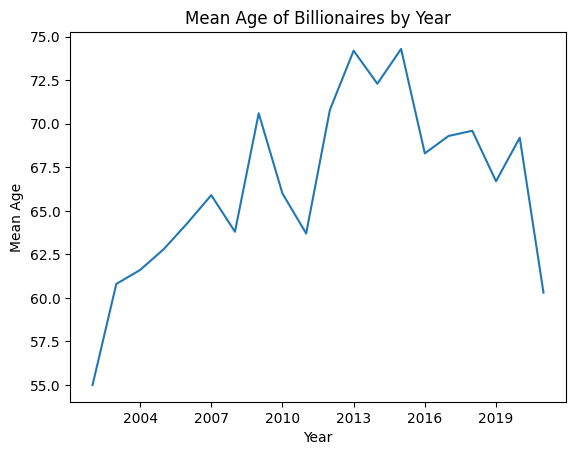

In [20]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
# Convert index to int
ax.plot(grouped_data.index.astype(int), grouped_data['age'])
# Force integer ticks
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.title('Mean Age of Billionaires by Year')
plt.show()

as you can see , average age of billionaires has been increasing but since 2020 , relatively younger individuals entered the billionaire ranks

Text(0.5, 1.0, 'Wealth of Major Tech Companies Owners over years')

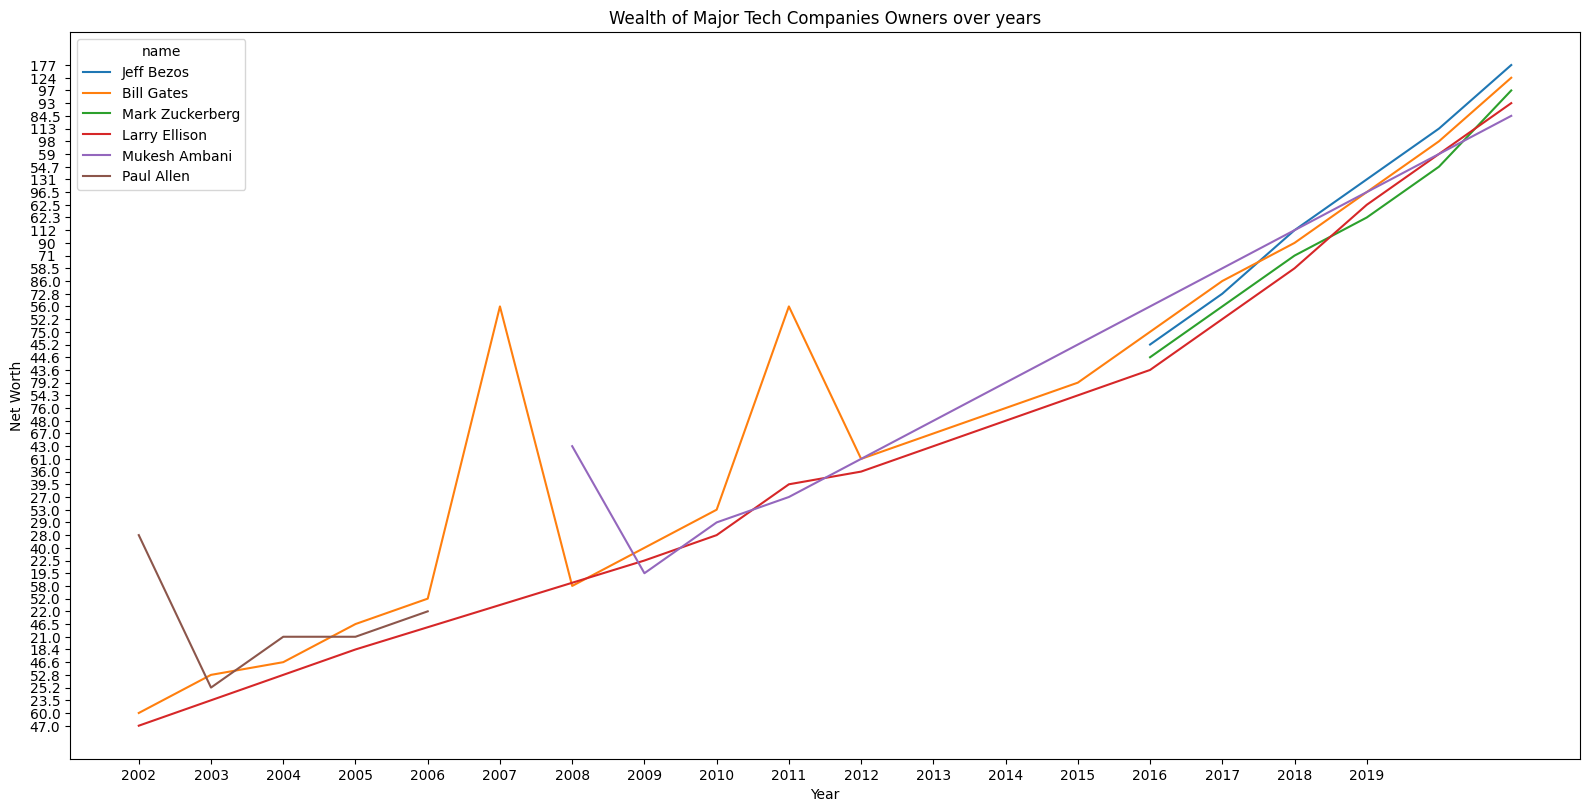

In [21]:
x1 = list(range(2002,2020))
plt.figure(figsize=(16,8))
filter = ['Bill Gates','Jeff Bezos','Mark Zuckerberg','Paul Allen','Larry Ellison', "Mukesh Ambani"]
comparisonn = df[df['name'].isin(filter)][['name','year','net_worth']]
sns.lineplot(data=comparisonn,x='year',y='net_worth',hue='name')
plt.xticks(x1,x1)
plt.tight_layout()  # Adjust layout
plt.xlabel('Year')
plt.ylabel('Net Worth')
plt.title('Wealth of Major Tech Companies Owners over years')

In [22]:
comparisonn.head(20)

,name,year,net_worth
0,Jeff Bezos,2021,177
3,Bill Gates,2021,124
4,Mark Zuckerberg,2021,97
6,Larry Ellison,2021,93
9,Mukesh Ambani,2021,84.5
10,Jeff Bezos,2020,113
11,Bill Gates,2020,98
14,Larry Ellison,2020,59
16,Mark Zuckerberg,2020,54.7
20,Jeff Bezos,2019,131


Text(0.5, 1.0, 'Wealth of Major Tech Companies  over years')

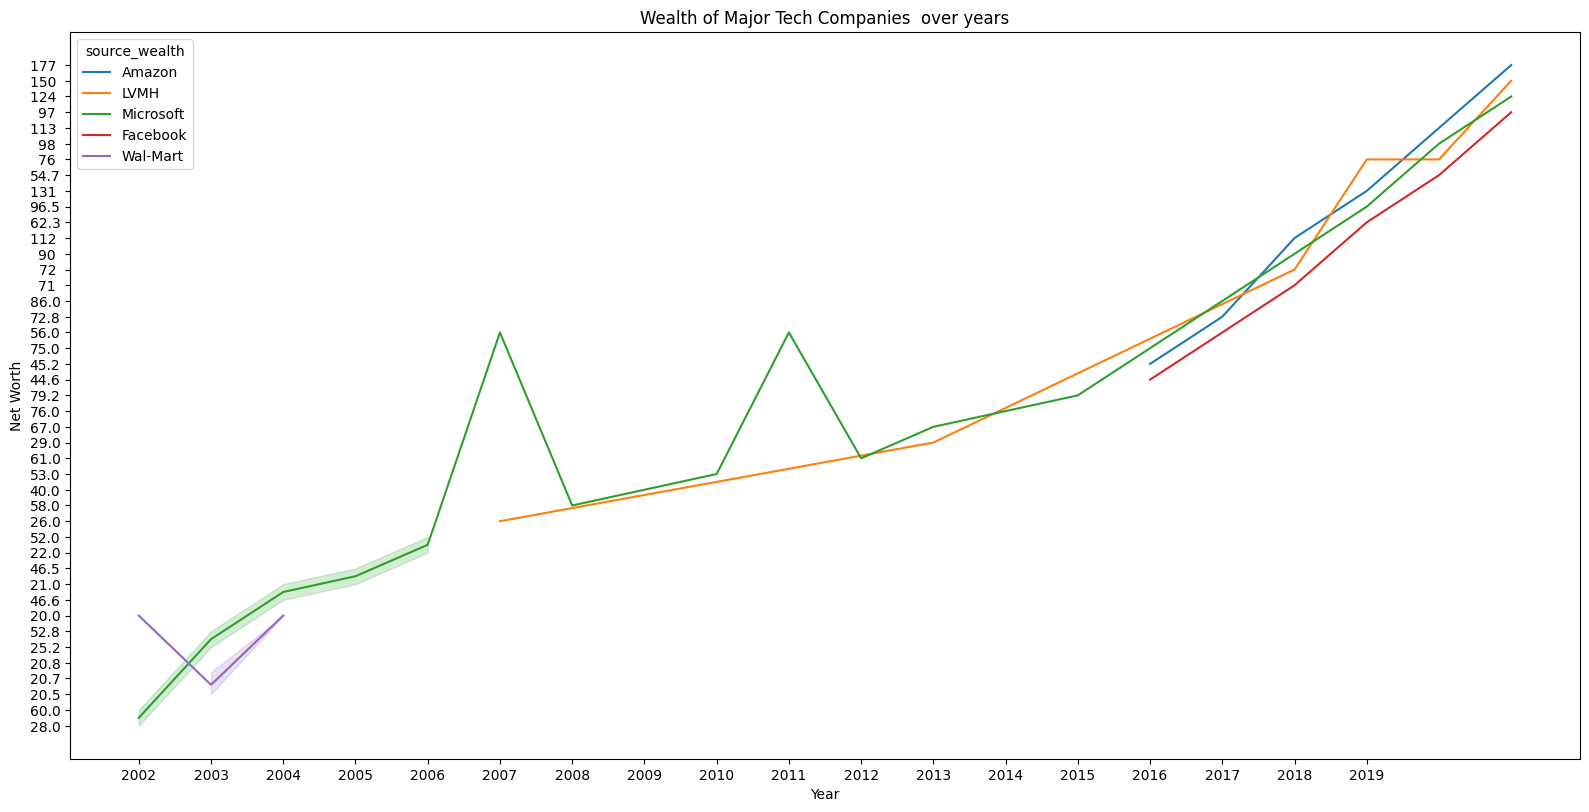

In [24]:
plt.figure(figsize=(16,8))
filter = ['Microsoft','Facebook','Bershire Hathway','Wal-Mart','Amazon','LVMH']
comparison = df[df['source_wealth'].isin(filter)][['source_wealth','year','net_worth']]
sns.lineplot(data=comparison,x='year',y='net_worth',hue='source_wealth')
plt.xticks(x1,x1)
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Net Worth')
plt.title('Wealth of Major Tech Companies  over years')

In [25]:
comparison.head(20)

,source_wealth,year,net_worth
0,Amazon,2021,177
2,LVMH,2021,150
3,Microsoft,2021,124
4,Facebook,2021,97
10,Amazon,2020,113
11,Microsoft,2020,98
12,LVMH,2020,76
16,Facebook,2020,54.7
20,Amazon,2019,131
21,Microsoft,2019,96.5


Age Distribution of Wealthy Individuals:

In [26]:
df_copy['age_range'] = pd.cut(df_copy['age'], bins=[0, 18, 25, 35, 50, 65, 100], labels=['0-18', '19-25', '26-35', '36-50', '51-65', '65+'])

In [27]:
df_copy

,year,rank,name,net_worth,age,natinality,source_wealth,age_range
0,2021,1,Jeff Bezos,177.0,57,United States,Amazon,51-65
1,2021,2,Elon Musk,151.0,49,United States,"Tesla, SpaceX",36-50
2,2021,3,Bernard Arnault & family,150.0,72,France,LVMH,65+
3,2021,4,Bill Gates,124.0,65,United States,Microsoft,51-65
4,2021,5,Mark Zuckerberg,97.0,36,United States,Facebook,36-50
...,...,...,...,...,...,...,...,...
195,2002,6,Al-Waleed bin Talal,200.0,43,Saudi Arabia,Kingdom Holding Company,36-50
196,2002,7,S. Robson Walton,200.0,57,United States,Wal-Mart,51-65
197,2002,8,Masayoshi Son,194.0,43,Japan,"Softbank Capital, SoftBank Mobile",36-50
198,2002,9,Michael Dell,191.0,35,United States,Dell,26-35


In [28]:
age_range_counts = df_copy.groupby('age_range').count().reset_index()
age_range_counts

,age_range,year,rank,name,net_worth,age,natinality,source_wealth
0,0-18,0,0,0,0,0,0,0
1,19-25,0,0,0,0,0,0,0
2,26-35,6,6,6,6,6,6,6
3,36-50,20,20,20,20,20,20,20
4,51-65,64,64,64,64,64,64,64
5,65+,110,110,110,110,110,110,110


[Text(0.5, 0, 'Age Range'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count vs Age Range')]

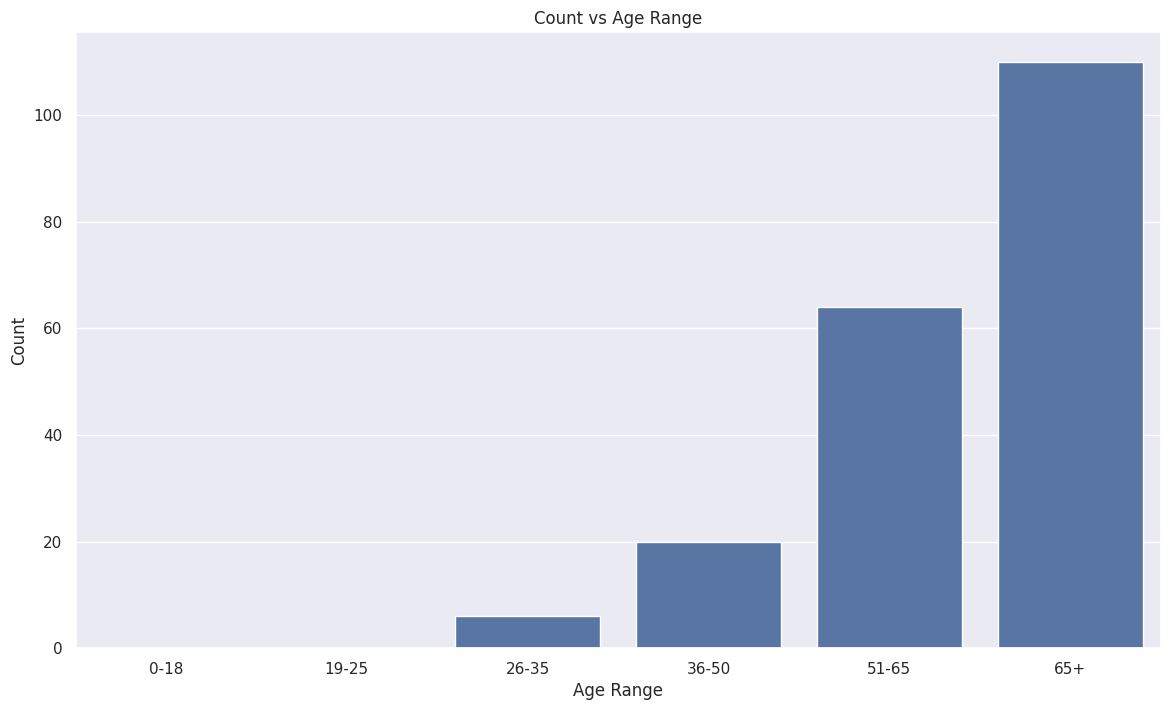

In [29]:
sns.set(rc = {'figure.figsize':(14, 8)})
k=sns.barplot(x="age_range",y="year",data=age_range_counts)
k.set(xlabel ="Age Range", ylabel = "Count", title ='Count vs Age Range')

Most of the billionaires are of 65+ years

Determing the richest individuals of different years

In [30]:
collect=df[df['rank']==1]
collect

,year,rank,name,net_worth,age,natinality,source_wealth
0,2021,1,Jeff Bezos,177,57,United States,Amazon
10,2020,1,Jeff Bezos,113,56,United States,Amazon
20,2019,1,Jeff Bezos,131,55,United States,Amazon
30,2018,1,Jeff Bezos,112,54,United States,Amazon
40,2017,1,Bill Gates,86.0,61,United States,Microsoft
50,2016,1,Bill Gates,75.0,60,United States,Microsoft
60,2015,1,Bill Gates,79.2,59,United States,Microsoft
70,2014,1,Bill Gates,76.0,58,United States,Microsoft
80,2013,1,Carlos Slim & family,73.0,73,Mexico,"América Móvil, Grupo Carso"
90,2012,1,Carlos Slim & family,69.0,72,Mexico,"América Móvil, Grupo Carso"


Jeff Bezos and Bill Gates have been dominating

Who was the youngest billionaire?

In [31]:
df['age'].aggregate(['min'])

,age
min,31


In [32]:
df[df['age']==31]

,year,rank,name,net_worth,age,natinality,source_wealth
55,2016,6,Mark Zuckerberg,44.6,31,United States,Facebook


Mark Zuckerberg is the youngest billionaire of all time , a true top g

#Predictive modelling for networth:

##Using Linear Regression




In [33]:
# x and y should be numerical columns only

X = df[['year', 'age']]

# Target variable
y = df['net_worth']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

Mean Squared Error: 261.6135491521271
R-squared (R2): 0.27437947907457283


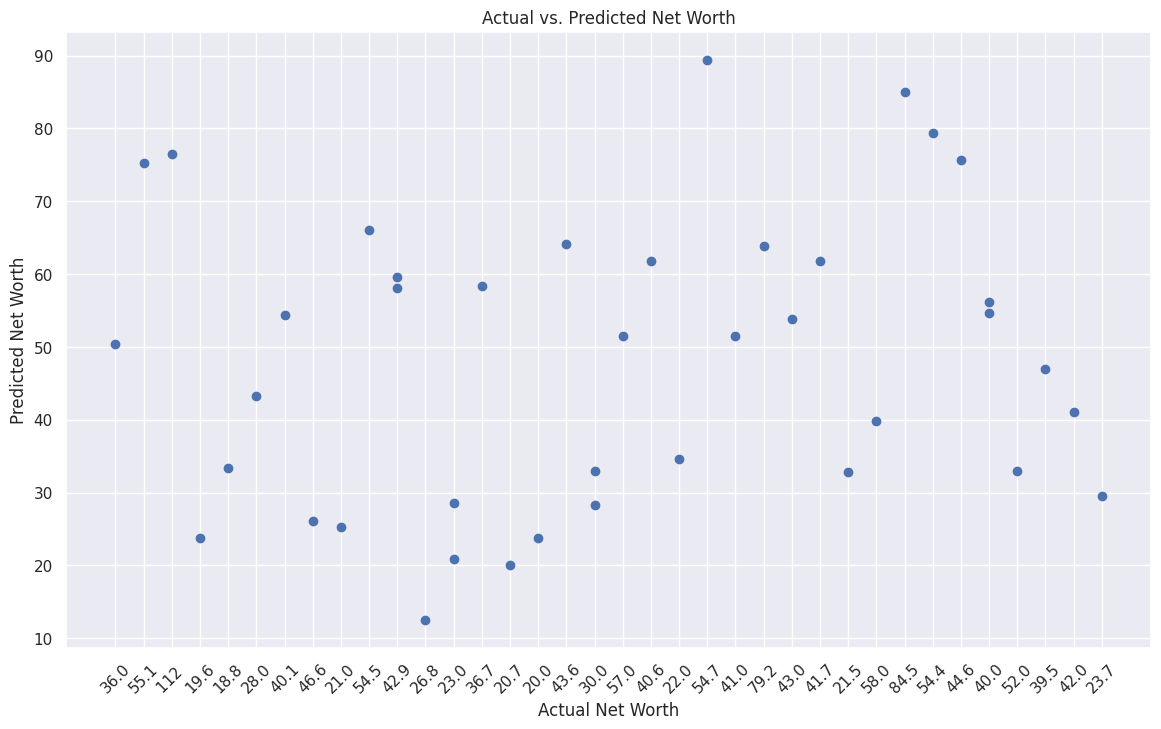

In [34]:
# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {lr_mse}")
print(f"R-squared (R2): {lr_r2}")

# Visualize the predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Net Worth")
plt.xticks(rotation=45)
plt.ylabel("Predicted Net Worth")
plt.title("Actual vs. Predicted Net Worth")
plt.show()

##Using random forest

In [35]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared (R2): {rf_r2}")

Mean Squared Error: 265.7312572923611
R-squared (R2): 0.26295845927105355


##Using Gradient Boosting

In [37]:
# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [38]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {gb_mse}")
print(f"R-squared (R2): {gb_r2}")

Mean Squared Error: 219.7226847713439
R-squared (R2): 0.3905694506280901


##Using SVM

In [39]:
# Create a Support Vector Machine Regressor model
model = SVR(kernel='linear')  # You can choose different kernel functions (e.g., 'linear', 'rbf', 'poly')

# Fit the model to the training data
model.fit(X_train, y_train)

SVR(kernel='linear')

In [40]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
svm_mse = mean_squared_error(y_test, y_pred)
svm_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {svm_mse}")
print(f"R-squared (R2): {svm_r2}")

Mean Squared Error: 218.53541901900263
R-squared (R2): 0.393862492584376


##Using XGBoost

In [41]:
# Create an XGBoost Regressor model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error: 338.573850377288
R-squared (R2): 0.06091970205307007


In [44]:
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'XGBoost'],
    'MSE': [lr_mse, rf_mse, gb_mse, svm_mse, mse],
    'R2': [lr_r2, rf_r2, gb_r2, svm_r2, r2]
}

df_eval = pd.DataFrame(data)
display(df_eval)

,Model,MSE,R2
0,Linear Regression,261.613549,0.274379
1,Random Forest,265.731257,0.262958
2,Gradient Boosting,219.722685,0.390569
3,SVM,218.535419,0.393862
4,XGBoost,338.573850,0.060920
